In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [2]:
data1 = pd.read_excel("附件1.xlsx")
data2 = pd.read_csv("附件2.csv",encoding='ANSI')
data3 = pd.read_excel("附件3.xlsx")
data4 = pd.read_excel("附件4.xlsx")

In [3]:
data3

,日期,单品编码,批发价格(元/千克)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [4]:
data2

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


直接计算总利润和总成本，以天为单位

In [5]:
class_list = [0.0]*6
all_list = np.array([class_list]*1095)
chengben_list = np.array([class_list]*1095)
tinydict = {'花叶类': 0, '花菜类':1,'水生根茎类': 2,'茄类': 3, '辣椒类': 4, '食用菌': 5}

## 首先计算成本及利润

In [6]:
## 对应天的批发价
data3[(data3["单品编码"] == data2.iloc[0,2]) & (data3["日期"] == data2.iloc[0,0])].iloc[0,2]

4.32

In [7]:
time0 = datetime.datetime.strptime('2020-07-01',"%Y-%m-%d")
for i in range(len(data2)):
    if i % 10000 == 0:
        print(i)
    time_tmp = datetime.datetime.strptime(data2.iloc[i][0],"%Y-%m-%d")
    index_1 = data_timedelta = (time_tmp-time0).days
    index_2 = tinydict[data1[data1["单品编码"] == data2.iloc[i][2]].iloc[0][3]]
    sum_money = (data2.iloc[i,4] - data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    chengben_money = (data3[(data3["单品编码"] == data2.iloc[i,2]) & (data3["日期"] == data2.iloc[i,0])].iloc[0,2]) * data2.iloc[i,3]
    all_list[index_1][index_2] += sum_money
    chengben_list[index_1][index_2] += chengben_money

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000


## 绘制关系曲线

In [8]:
lirun_df = pd.read_csv("A2_lirun.csv")
del lirun_df["Unnamed: 0"]
chengben_df = pd.read_csv("A2_chengben.csv")
del chengben_df["Unnamed: 0"]
lirun_list = lirun_df.values
chengben_list = chengben_df.values

In [9]:
lirun_list.shape

(1095, 6)

In [10]:
chengben_list.shape

(1095, 6)

In [11]:
alpha = (chengben_list + lirun_list) / chengben_list -1

C:\Users\Admin\AppData\Local\Temp\ipykernel_26368\1804320472.py:1: RuntimeWarning: invalid value encountered in true_divide
  alpha = (chengben_list + lirun_list) / chengben_list -1


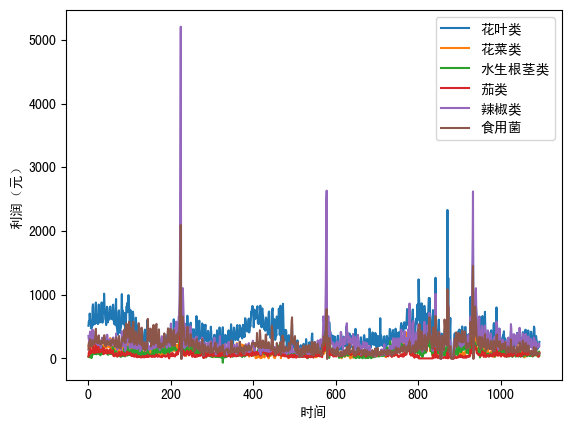

In [99]:
plt.plot(lirun_list)
plt.ylabel("利润（元）")
plt.xlabel("时间")
plt.legend(['花叶类','花菜类','水生根茎类','茄类', '辣椒类', '食用菌'])
plt.show()

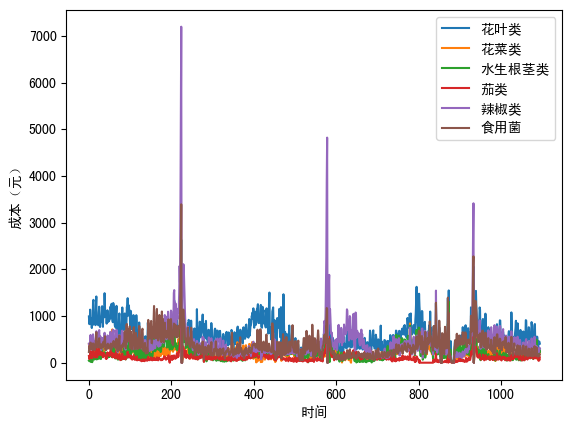

In [100]:
plt.plot(chengben_list)
plt.ylabel("成本（元）")
plt.xlabel("时间")
plt.legend(['花叶类','花菜类','水生根茎类','茄类', '辣椒类', '食用菌'])
plt.show()

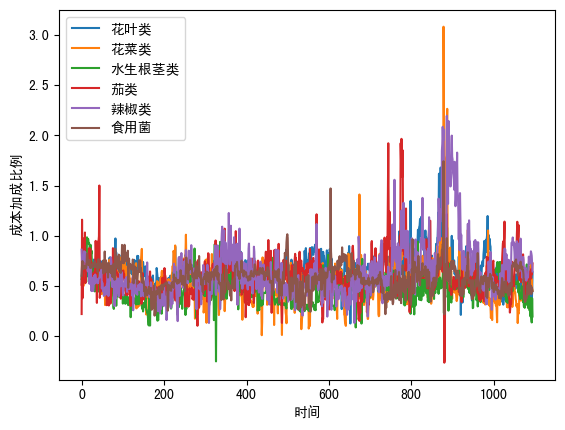

In [101]:
plt.plot(alpha)
plt.ylabel("成本加成比例")
plt.xlabel("时间")
plt.legend(['花叶类','花菜类','水生根茎类','茄类', '辣椒类', '食用菌'])
plt.show()

In [102]:
A1_result = pd.read_csv("A1_result.csv")
del A1_result['Unnamed: 0']

In [103]:
xiaoshouliang = A1_result.values

In [104]:
xiaoshouliang.shape

(1095, 6)

In [105]:
alpha.shape

(1095, 6)

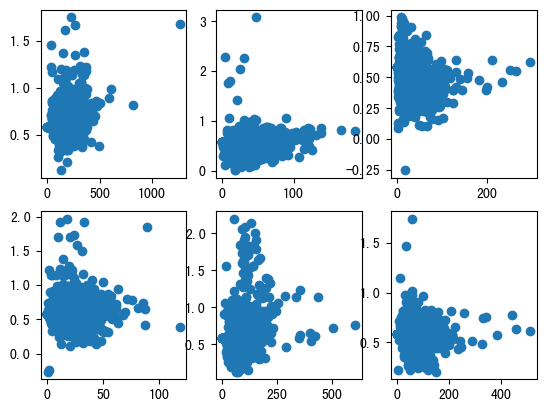

In [106]:
plt.figure()
plt.subplot(231)
plt.scatter(xiaoshouliang[0:1094,0],alpha[0:1094,0])

plt.subplot(232)
plt.scatter(xiaoshouliang[0:1094,1],alpha[0:1094,1])

plt.subplot(233)
plt.scatter(xiaoshouliang[0:1094,2],alpha[0:1094,2])

plt.subplot(234)
plt.scatter(xiaoshouliang[0:1094,3],alpha[0:1094,3])

plt.subplot(235)
plt.scatter(xiaoshouliang[0:1094,4],alpha[0:1094,4])

plt.subplot(236)
plt.scatter(xiaoshouliang[0:1094,5],alpha[0:1094,5])

plt.show()

In [107]:
pd.DataFrame([xiaoshouliang[:,0],alpha[:,0]]).T.corr()

,0,1
0,1.000000,0.191195
1,0.191195,1.000000


In [108]:
pd.DataFrame([xiaoshouliang[:,1],alpha[:,1]]).T.corr()

,0,1
0,1.000000,0.130392
1,0.130392,1.000000


In [109]:
pd.DataFrame([xiaoshouliang[:,2],alpha[:,2]]).T.corr()

,0,1
0,1.000000,-0.204903
1,-0.204903,1.000000


In [110]:
pd.DataFrame([xiaoshouliang[:,3],alpha[:,3]]).T.corr()

,0,1
0,1.000000,0.057896
1,0.057896,1.000000


In [111]:
pd.DataFrame([xiaoshouliang[:,4],alpha[:,4]]).T.corr()

,0,1
0,1.000000,0.272016
1,0.272016,1.000000


In [112]:
pd.DataFrame([xiaoshouliang[:,5],alpha[:,5]]).T.corr()

,0,1
0,1.000000,-0.089013
1,-0.089013,1.000000


## 相乘试试？

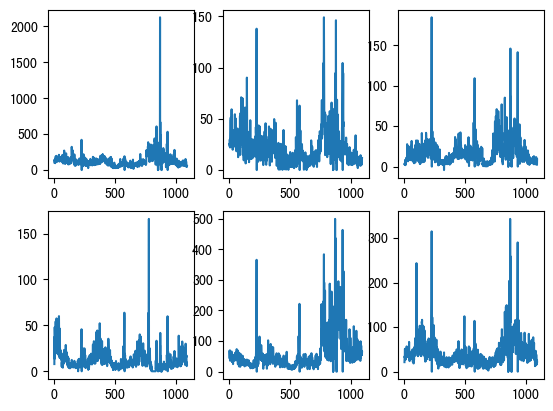

In [113]:
plt.figure()
plt.subplot(231)
plt.plot(xiaoshouliang[0:1094,0]*alpha[0:1094,0])

plt.subplot(232)
plt.plot(xiaoshouliang[0:1094,1]*alpha[0:1094,1])

plt.subplot(233)
plt.plot(xiaoshouliang[0:1094,2]*alpha[0:1094,2])

plt.subplot(234)
plt.plot(xiaoshouliang[0:1094,3]*alpha[0:1094,3])

plt.subplot(235)
plt.plot(xiaoshouliang[0:1094,4]*alpha[0:1094,4])

plt.subplot(236)
plt.plot(xiaoshouliang[0:1094,5]*alpha[0:1094,5])

plt.show()

## 计算alpha boxplot

In [114]:
df_alpha = pd.DataFrame(alpha)

In [115]:
pd.DataFrame(alpha).to_csv("alpha.csv")

In [116]:
df_alpha.fillna(value=0.583,inplace=True)

In [117]:
r_alpha = np.array(df_alpha.values)

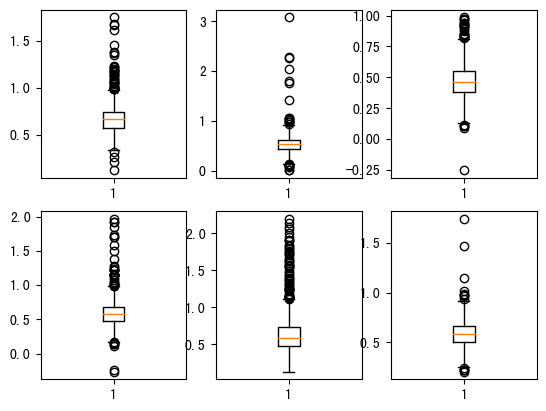

In [118]:
plt.figure()
plt.subplot(231)
plt.boxplot(r_alpha[:,0])

plt.subplot(232)
plt.boxplot(r_alpha[:,1])

plt.subplot(233)
plt.boxplot(r_alpha[:,2])

plt.subplot(234)
plt.boxplot(r_alpha[:,3])

plt.subplot(235)
plt.boxplot(r_alpha[:,4])

plt.subplot(236)
plt.boxplot(r_alpha[:,5])

plt.show()

In [119]:
r_alpha.mean()

0.5825202416941658

In [120]:
r_alpha.std()

0.20376792795931503

# 预测后7天定价策略

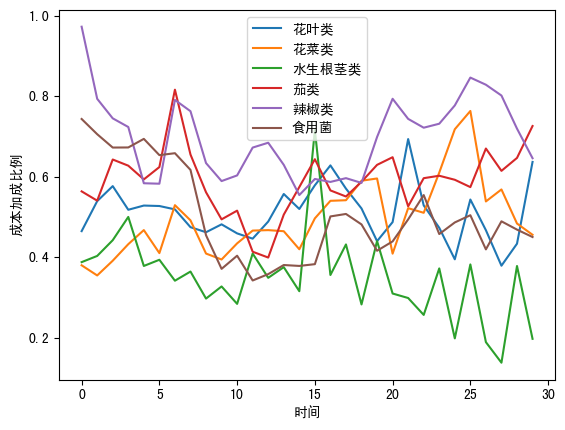

In [121]:
plt.plot(alpha[-30:])
plt.ylabel("成本加成比例")
plt.xlabel("时间")
plt.legend(['花叶类','花菜类','水生根茎类','茄类', '辣椒类', '食用菌'])
plt.show()

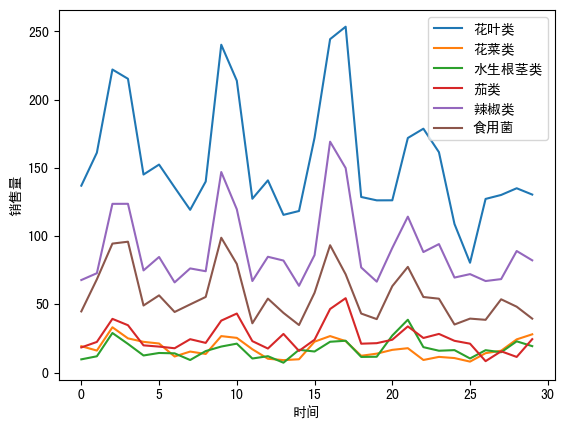

In [122]:
plt.plot(xiaoshouliang[-30:])
plt.ylabel("销售量")
plt.xlabel("时间")
plt.legend(['花叶类','花菜类','水生根茎类','茄类', '辣椒类', '食用菌'])
plt.show()

In [123]:
#pd.DataFrame(xiaoshouliang[-30:]).to_csv("D://1.csv")

In [124]:
sum(xiaoshouliang.T)[-7:]

array([365.833, 264.32 , 231.982, 272.247, 299.124, 331.34 , 324.358])

In [125]:
a = np.array([365.833, 264.32 , 231.982, 272.247, 299.124, 331.34 , 324.358])

In [126]:
sum(a)

2089.204

In [127]:
a/sum(a)

array([0.1751064 , 0.12651708, 0.11103846, 0.13031135, 0.14317606,
       0.15859629, 0.15525435])

## SVR预测

In [128]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))


f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


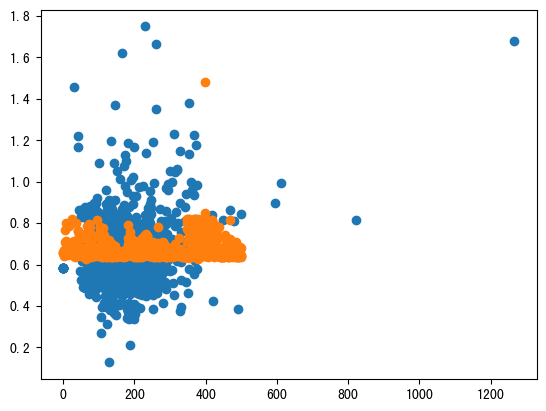

In [129]:
regr.fit(xiaoshouliang[0:1094,0].reshape(-1,1), r_alpha[0:1094,0].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[0:1094,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,0],alpha[0:1094,0])
plt.scatter(np.linspace(0,500,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [130]:
regr.predict(np.array([152.9374,110.988856,96.13208,113.61064,124.971704,138.954552,135.45884]).reshape(-1,1))

array([0.64149936, 0.64675041, 0.65965633, 0.64510557, 0.64019947,
       0.63880809, 0.63871794])

f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


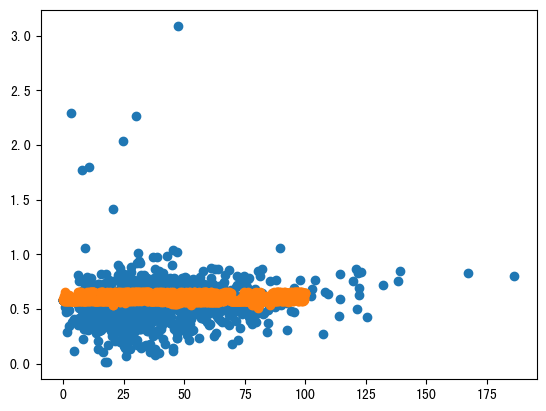

In [131]:
regr.fit(xiaoshouliang[0:1094,1].reshape(-1,1), r_alpha[0:1094,1].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[:,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,1],alpha[0:1094,1])
plt.scatter(np.linspace(0,100,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [132]:
regr.predict(np.array([19.793725,14.364589,12.44177,14.70391,16.174301,17.984013,17.531585]).reshape(-1,1))

array([0.4886723 , 0.51323409, 0.52326219, 0.51143636, 0.50380922,
       0.49533966, 0.49731895])

f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


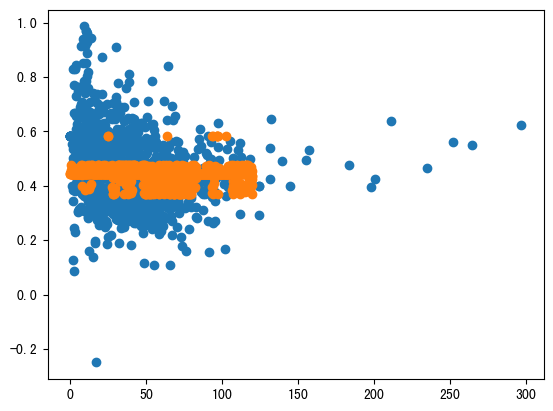

In [133]:
regr.fit(xiaoshouliang[0:1094,2].reshape(-1,1), r_alpha[0:1094,2].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[:,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,2],alpha[0:1094,2])
plt.scatter(np.linspace(0,120,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [134]:
regr.predict(np.array([20.42285,14.821154,12.83722,15.17126,16.688386,18.555618,18.08881]).reshape(-1,1))

array([0.49148217, 0.52465575, 0.53768494, 0.52237203, 0.5126793 ,
       0.50148851, 0.50418885])

f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


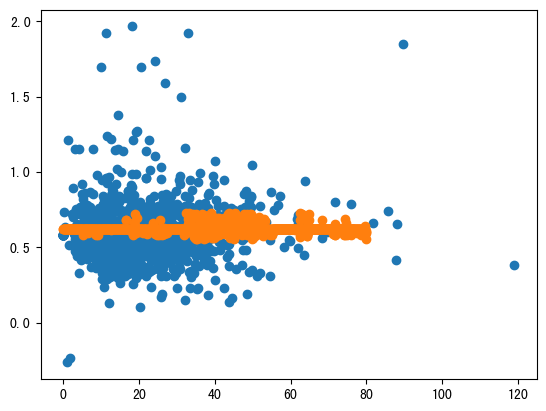

In [135]:
regr.fit(xiaoshouliang[0:1094,3].reshape(-1,1), r_alpha[0:1094,3].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[0:1094,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,3],alpha[0:1094,3])
plt.scatter(np.linspace(0,80,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [136]:
regr.predict(np.array([23.277625,16.892905,14.63165,17.29195,19.021145,21.149385,20.617325]).reshape(-1,1))

array([0.5743399 , 0.57272482, 0.57557405, 0.57242316, 0.57165369,
       0.57202926, 0.57177473])

f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


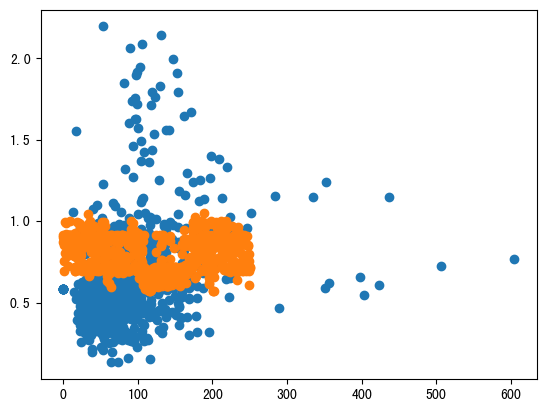

In [137]:
regr.fit(xiaoshouliang[0:1094,4].reshape(-1,1), r_alpha[0:1094,4].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[0:1094,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,4],alpha[0:1094,4])
plt.scatter(np.linspace(0,250,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [138]:
regr.predict(np.array([95.039525,68.971541,59.73913,70.60079,77.660869,86.350197,84.177865]).reshape(-1,1))

array([0.64406015, 0.6019088 , 0.59671893, 0.60265411, 0.6073549 ,
       0.62042597, 0.61617252])

f:\Program Files\Python38\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


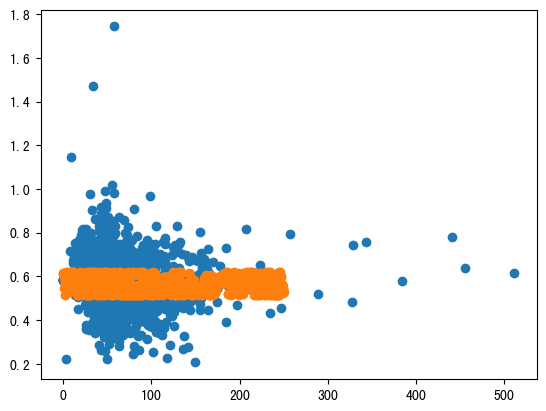

In [139]:
regr.fit(xiaoshouliang[0:1094,5].reshape(-1,1), r_alpha[0:1094,5].reshape(-1,1))
p_alpha_1 = regr.predict(xiaoshouliang[0:1094,0].reshape(-1,1))
plt.figure()
plt.scatter(xiaoshouliang[0:1094,5],alpha[0:1094,5])
plt.scatter(np.linspace(0,250,len(p_alpha_1)).reshape(-1,1),p_alpha_1)
#plt.xlim(0,500)

In [140]:
regr.predict(np.array([54.139575,39.289863,34.03059,40.21797,44.239767,49.189671,47.952195]).reshape(-1,1))

array([0.58435042, 0.59874157, 0.59875461, 0.5984628 , 0.59626156,
       0.59137495, 0.59281272])

In [141]:
pd.DataFrame([[0.64162359, 0.64675022, 0.65962791, 0.64511358, 0.64024954,
       0.63890909, 0.6388077],
[0.48805029, 0.51250158, 0.52252536, 0.51070643, 0.50309695,
       0.49466415, 0.49663268],
[0.49130904, 0.52432856, 0.53734867, 0.52204878, 0.51238189,
       0.50124286, 0.50392822],
[0.57378093, 0.57337657, 0.57647492, 0.57299349, 0.57180427,
       0.57168905, 0.57154046],
[0.64409034, 0.60185003, 0.59662068, 0.60260536, 0.60735198,
       0.62046243, 0.6162026],
[0.58436081, 0.59889831, 0.59899586, 0.59860377, 0.59633877,
       0.5913978 , 0.59284571]]).T.to_csv("dingjia.csv")